# Fourier series: supplemental material

Executing the following cell loads a non-default css style for the notebook.

In [5]:
from IPython.core.display import HTML
def css_styling():
    try:
        with open("tma4125.css", "r") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass #Do nothing

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

We need some boilerplate code for arrays, plotting and nice widgets.

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [7]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]

## Examples of Fourier series

First we define some plotting functions which will visualize
the $N$-th partial sum for a given function $f$. The examples below show how to use it.

In [17]:
def plot_partial_sum(f, x, S_N, N, title=""):
    y = f(x)
    s_N = S_N(x, N)
    plt.plot(x, y, label="$f$")
    plt.plot(x, s_N, label="$S_N$")
    plt.title(title)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("$S_N(x)$")
    plt.show()

### Example 1: $f(x) = |x|$

In Assignment 3, you will show that $N$-th partial sum of the trigonometric series for the function
$f(x) = |x|$ is 

$$
S_N(f)(x)
=
\dfrac{\pi}{2}
+\sum_{n=1}^N \dfrac{2}{\pi n^2}
\left(
-1 + (-1)^n
\right)
\cos(nx)
$$

In [18]:
x = np.linspace(-1.0*np.pi, 1.0*np.pi, 1000) # Interval
f = lambda  x : np.abs(x)  # Define f

# Define partial sum
def S_N(x, N):
    s = np.pi/2.*np.ones_like(x)
    for n in range(1,N+1):
        s += 2/(np.pi * n**2)*(-1 + (-1)**n)*np.cos(n*x)
    return s

title = "$f(x) = |x|$"

# Define a helper function
pps = lambda N: plot_partial_sum(f, x, S_N, N, title)

In [19]:
slider = widgets.IntSlider(min = 0,
                           max = 20,
                           step = 1,
                           description="Order N",
                           value = 0)
interact(pps, N=slider)

interactive(children=(IntSlider(value=0, description='Order N', max=20), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(N)>

### Example 2: $f(x) = x$

In Assignment 3, you will show that $N$-th partial sum of the trigonometric series for the function
$f(x) = x$ is

$$
S_N(f)(x)
=
\sum_{n=1}^N \dfrac{2}{n}
(-1)^{n+1}
\sin(nx)
$$

In [22]:
# Interval
x = np.linspace(-3*np.pi, 3*np.pi, 1000)

# Define f
f = lambda  x : np.piecewise(x, 
                             [abs(x + 2*np.pi) < np.pi,
                              abs(x) < np.pi,
                              abs(x - 2*np.pi) < np.pi],
                             [lambda x: x + 2*np.pi, 
                              lambda x: x,
                              lambda x: x - 2*np.pi])


# Define partial sum
def S_N(x, N):
    s = np.pi/2.*np.zeros_like(x)
    for n in range(1,N+1):
        s += 2./n*(-1)**(n+1)*np.sin(n*x)
    return s

title = "$f(x) = x$"

# Define a helper function
pps = lambda N: plot_partial_sum(f, x, S_N, N, title)

In [23]:
interact(pps, N=slider)

interactive(children=(IntSlider(value=8, description='Order N', max=20), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(N)>

### Example 2
The function $f$ is given 
\begin{equation*}
f(x) = 
\left\{
\begin{array}{rl}
 1 &\text{ if } 0 < x < \pi, \\
-1 &\text{ if } -\pi < x < 0
\end{array}
\right.
\end{equation*}

It Fourier series is
\begin{equation*}
f \sim
\sum_{n=1}^\infty \dfrac{2}{\pi n}
\left(
1 + (-1)^{n+1}
\right)
\sin(nx)
\end{equation*}

In [24]:
# Interval
x = np.linspace(-3*np.pi, 3*np.pi, 1000)

from numpy import heaviside as u
from numpy import pi

# Define f
f = lambda x :  -1*u(x+3*pi,0)+2*u(x+2*pi,0) -2*u(x+pi,0)+ 2*u(x,0) - 2*u(x-pi,0) + 2*u(x-2*pi,0)

# Define partial sum
def S_N(x, N):
    s = np.pi/2.*np.zeros_like(x)
    for n in range(1,N+1):
        s += 2./(np.pi*n)*(1 + (-1)**(n+1))*np.sin(n*x)
    return s

title = "$f(x)$"

# Define a helper function
pps = lambda N: plot_partial_sum(f, x, S_N, N, title)

In [25]:
slider = widgets.IntSlider(min = 0,
                           max = 20,
                           step = 1,
                           description="Order N",
                           value = 0)
interact(pps, N=slider)

interactive(children=(IntSlider(value=0, description='Order N', max=20), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(N)>

## The Dirichlet kernel

We plot the Dirichlet Kernel $D_N(x)$ for various $N$:

In [26]:
# Note that there is a (removable) singularity at x = 0.
D_N = lambda x, N: np.sin((N+0.5)*x)/np.sin(0.5*x)

def plot_dirichlet_kernel(N):
    x = np.linspace(-np.pi, np.pi, 10000)
    y = D_N(x, N)
    plt.plot(x, y)
    plt.title("Dirichlet kernel $D_N$ for various $N$")
    plt.xlabel("x")
    plt.ylabel("$D_N(x)$")
    plt.show()


In [27]:
slider = widgets.IntSlider(min = 0, max = 10, step = 1, description="Order N", value = 1)

interact(plot_dirichlet_kernel, N=slider)

interactive(children=(IntSlider(value=1, description='Order N', max=10), Output()), _dom_classes=('widget-inte…

<function __main__.plot_dirichlet_kernel(N)>

In [28]:
slider = widgets.IntSlider(min = 5, max = 100, step = 5, description="Order N", value = 5)

interact(plot_dirichlet_kernel, N=slider)

interactive(children=(IntSlider(value=5, description='Order N', min=5, step=5), Output()), _dom_classes=('widg…

<function __main__.plot_dirichlet_kernel(N)>

<IPython.core.display.Javascript object>


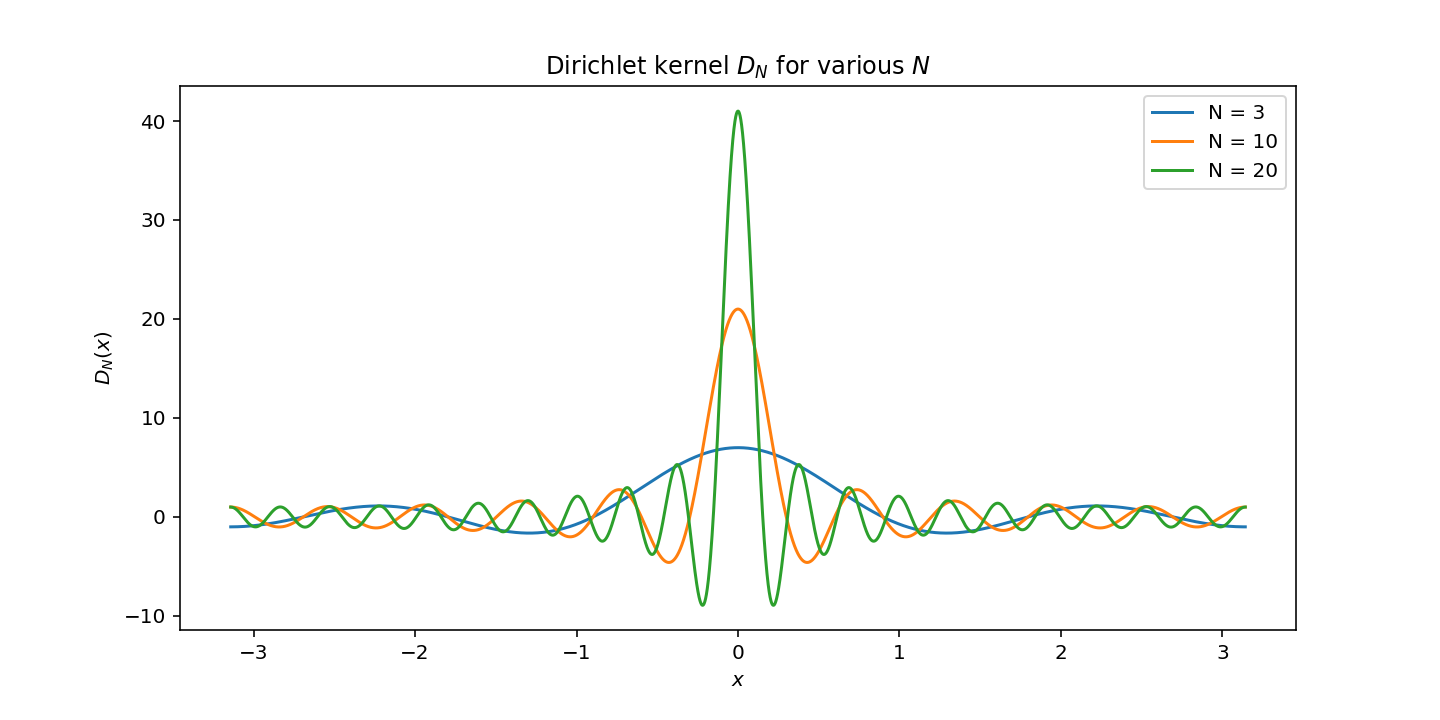

In [29]:
%matplotlib notebook
for N in [3, 10, 20]:
    x = np.linspace(-np.pi, np.pi, 10000)
    y = D_N(x, N)
    plt.plot(x, y, label="N = {}".format(N))
    
plt.title("Dirichlet kernel $D_N$ for various $N$")
plt.xlabel("$x$")
plt.ylabel("$D_N(x)$")
plt.legend()
plt.show()    